In [44]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import statsmodels.api as sm
import math
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression
from sklearn.cross_validation import cross_val_score, cross_val_predict

In [45]:
diabetes = datasets.load_diabetes()

(442, 10)


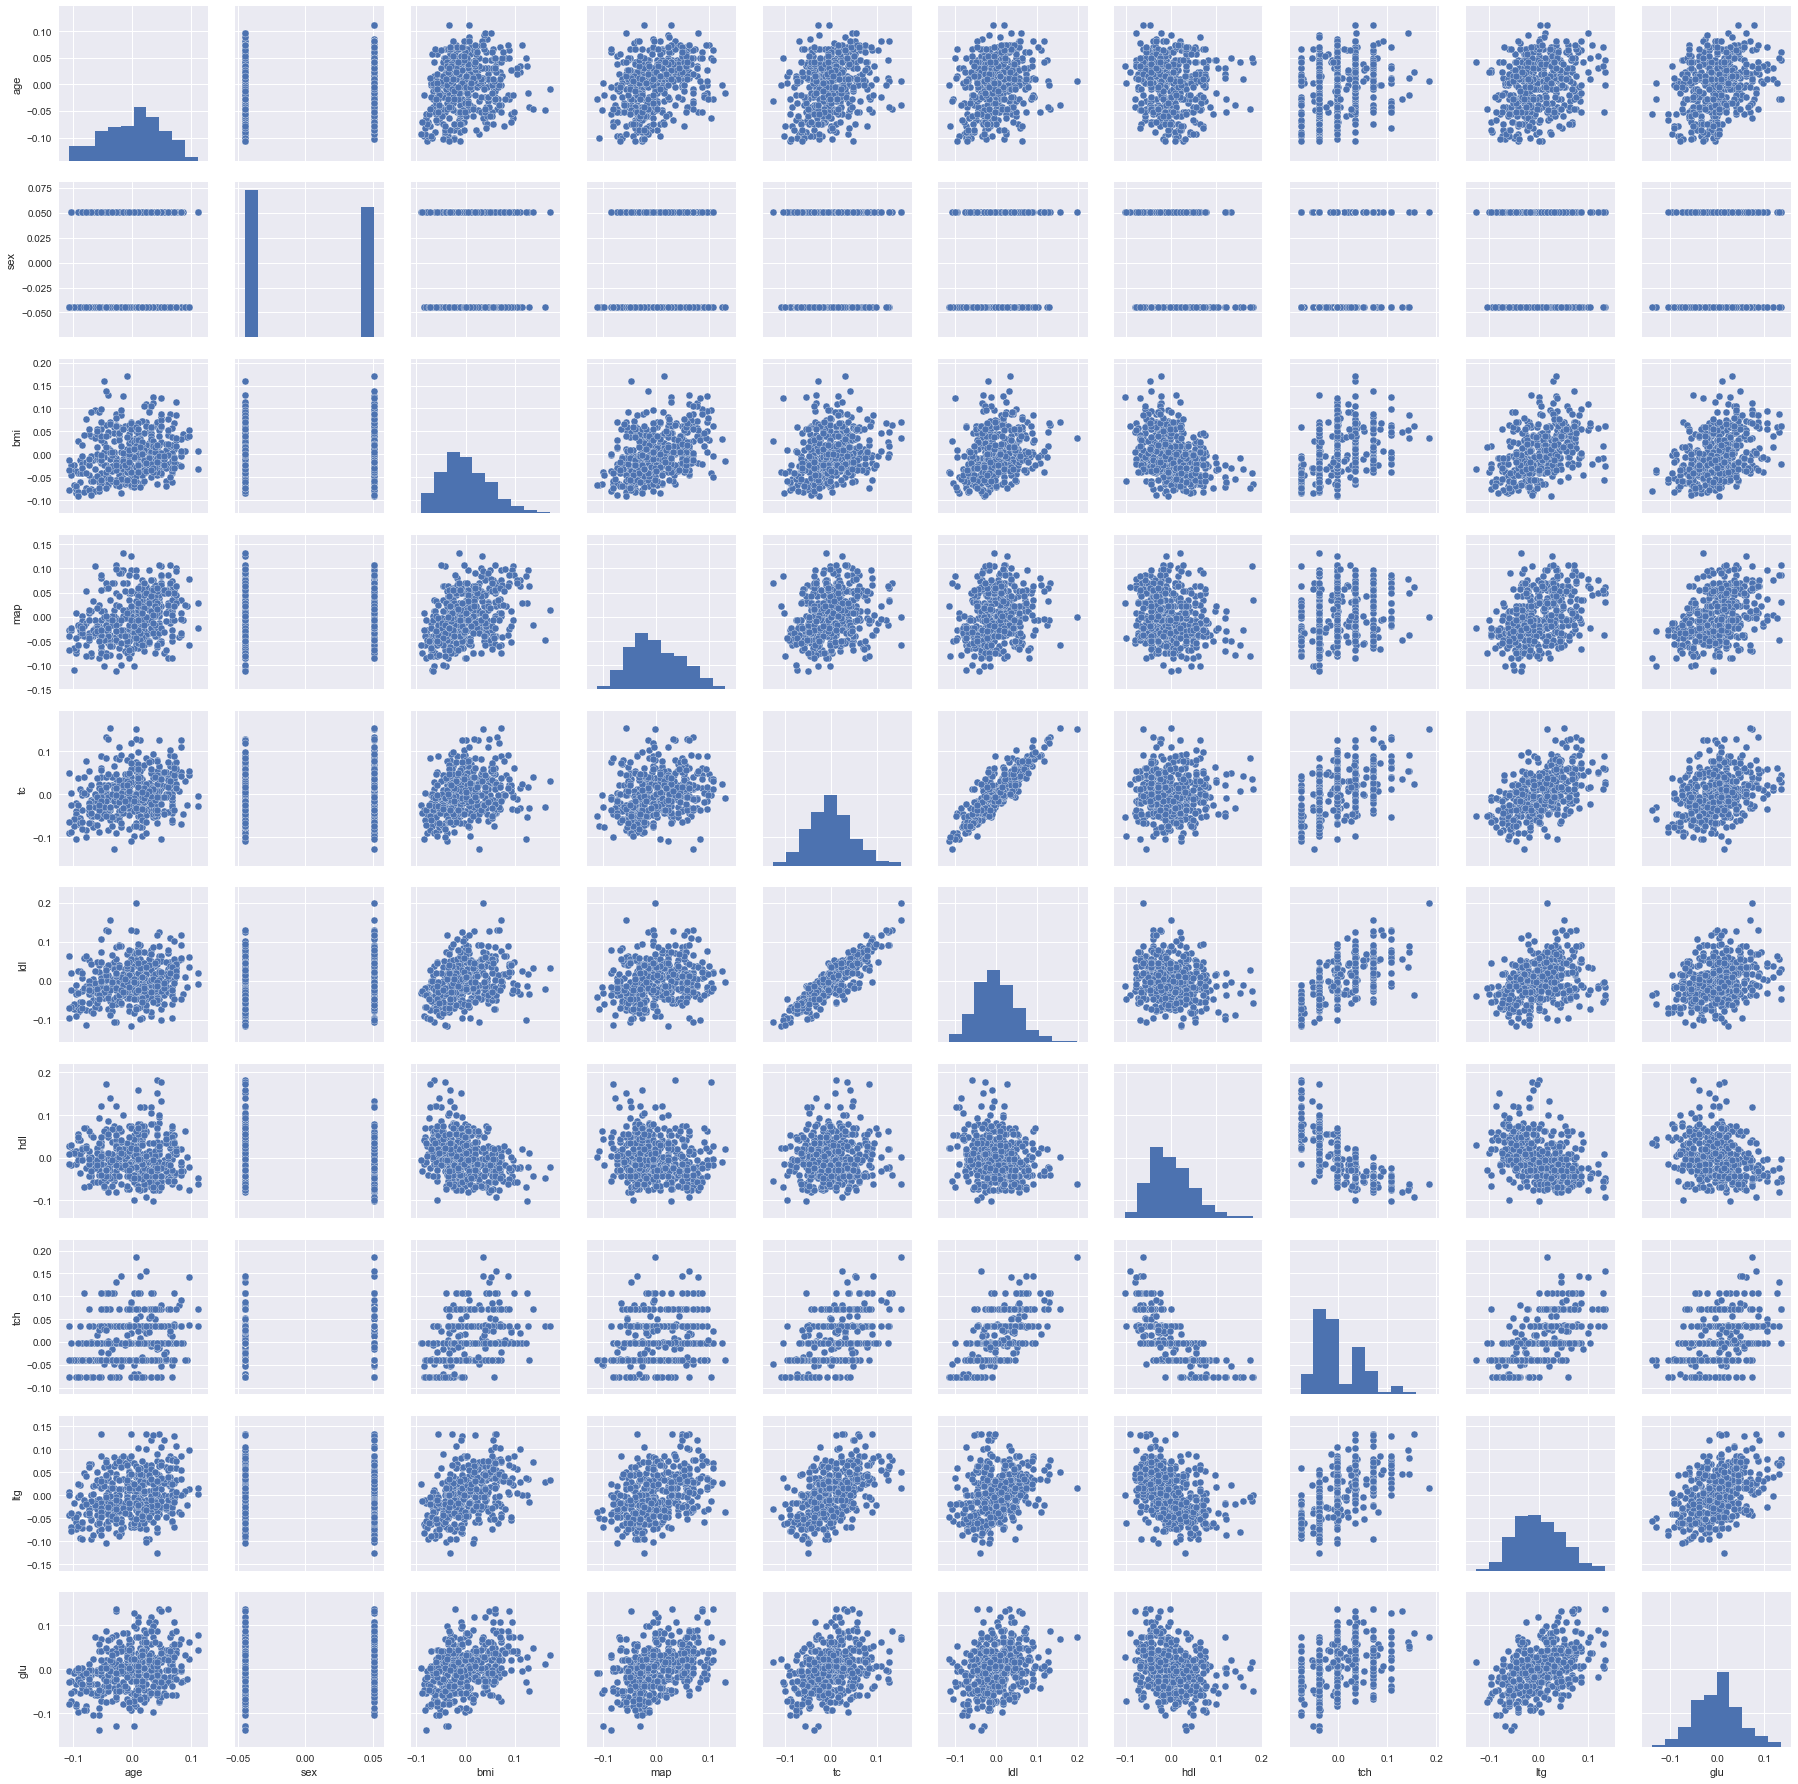

In [46]:
# View dict elements
diabetes.keys()

# View Data
print(diabetes.data.shape)
col_names = "age sex bmi map tc ldl hdl tch ltg glu".split()
data_frame = pd.DataFrame(diabetes.data, columns=col_names)
y = diabetes.target
sns.pairplot(data_frame)

In [47]:
# Check for extreme/suspicious values
for col_name in col_names:
    print(col_name,":",min(data_frame[col_name]),np.percentile(data_frame[col_name], 
        [25, 50, 75]),max(data_frame[col_name]))

age : -0.107225631607358 [-0.03729927  0.00538306  0.03807591] 0.110726675453815
sex : -0.044641636506989 [-0.04464164 -0.04464164  0.05068012] 0.0506801187398187
bmi : -0.0902752958985185 [-0.03422907 -0.00728377  0.03124802] 0.17055522598066
map : -0.112399602060758 [-0.03665645 -0.00567061  0.03564384] 0.132044217194516
tc : -0.126780669916514 [-0.03424784 -0.00432087  0.02835801] 0.153913713156516
ldl : -0.115613065979398 [-0.0303584  -0.00381907  0.02984439] 0.198787989657293
hdl : -0.10230705051742 [-0.03511716 -0.00658447  0.0293115 ] 0.181179060397284
tch : -0.076394503750001 [-0.03949338 -0.00259226  0.03430886] 0.185234443260194
ltg : -0.126097385560409 [-0.03324879 -0.00194763  0.03243323] 0.133598980013008
glu : -0.137767225690012 [-0.03317903 -0.0010777   0.02791705] 0.135611830689079


In [48]:
regr = linear_model.LinearRegression()

# LOO Cross-Validation 
scores = cross_val_score(regr, data_frame, y, cv=5)
print(scores)

[0.42955643 0.52259828 0.4826784  0.42650827 0.55024923]


First try LOO Cross-Validation using all possible models with 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 variables. For each run, calculate $$RMSE = \sqrt{\frac{1}{n}\sum \limits_{i=1}^n (y_i - \widehat{y}_{(-i)})^2}$$

Then try a forward selection algorithm and see what it picks. Use the AIC criterion (or BIC).

If time try LASSO for variable selection

In [49]:
import itertools
from sklearn.model_selection import LeaveOneOut


def looRMSE(X, y):
    loo = LeaveOneOut()
    rmse = 0
    for train, test in loo.split(X):
        regr = linear_model.LinearRegression()
        regr.fit(X[train], y[train])
        rmse += (regr.predict(X[test])[0] - y[test][0])**2
        
    rmse = np.sqrt(rmse/(X.shape[0]))
    return rmse    
        
     
tested = []
result = []
for i in range(len(col_names)):
    for j in range(1, i + 1):
        testCombos = itertools.combinations(np.arange(i), j)
        for c in testCombos:
            if set(c) in tested:
                continue
            tested.append(set(c))
            testSet = data_frame.values[:, c]
            result.append(looRMSE(testSet, y))
            print("{}, {}".format(set(c), result[-1]))
result = np.array(result)
print("{:.2f}, {}".format(result.min(), tested[result.argmin()]))
        
    
    
        

{0}, 75.95081527204351
{1}, 77.2847560422369
{0, 1}, 76.11820532265413
{2}, 62.63376523120489
{0, 2}, 62.463364783831516
{1, 2}, 62.77478371414172
{0, 1, 2}, 62.58145891624593
{3}, 69.39445383651498
{0, 3}, 69.44445141355504
{1, 3}, 69.36447635382996
{2, 3}, 60.24498341578517
{0, 1, 3}, 69.38290182603487
{0, 2, 3}, 60.355557176349215
{1, 2, 3}, 60.18958935048147
{0, 1, 2, 3}, 60.285751383326485
{4}, 75.57549361737414
{0, 4}, 74.97825371261395
{1, 4}, 75.69861166268521
{2, 4}, 62.55439426984623
{3, 4}, 69.04012253862854
{0, 1, 4}, 75.13966535343995
{0, 2, 4}, 62.4780545946217
{0, 3, 4}, 69.14929030566303
{1, 2, 4}, 62.69409272325003
{1, 3, 4}, 69.02227508734951
{2, 3, 4}, 60.32721929280956
{0, 1, 2, 4}, 62.59889984757421
{0, 1, 3, 4}, 69.11320042191895
{0, 2, 3, 4}, 60.447524631908614
{1, 2, 3, 4}, 60.276078529833725
{0, 1, 2, 3, 4}, 60.385845187240754
{5}, 76.15962142888738
{0, 5}, 75.38340725980777
{1, 5}, 76.32322843492751
{2, 5}, 62.763577218064995
{3, 5}, 69.17025867935133
{4, 5}, 

{0, 8}, 63.848918766754046
{8, 1}, 63.834613809529834
{8, 2}, 56.99104414051547
{8, 3}, 61.206357480705854
{8, 4}, 63.49859124539389
{8, 5}, 63.90628103139478
{8, 6}, 62.27450130913863
{8, 7}, 63.44691868027006
{0, 1, 8}, 63.88480404234462
{0, 8, 2}, 57.12189736874082
{0, 8, 3}, 61.29713634473344
{0, 8, 4}, 63.52787437116248
{0, 8, 5}, 63.984056496678136
{0, 8, 6}, 62.3270941366403
{0, 8, 7}, 63.542255926858225
{8, 1, 2}, 56.987637123005044
{8, 1, 3}, 60.929778636800165
{8, 1, 4}, 63.54358381105851
{8, 1, 5}, 63.97438863484848
{8, 1, 6}, 61.77935423245653
{8, 1, 7}, 63.30630168528829
{8, 2, 3}, 56.03177148437779
{8, 2, 4}, 56.55755338974281
{8, 2, 5}, 56.94801439150663
{8, 2, 6}, 56.55456290312574
{8, 2, 7}, 57.108270709132015
{8, 3, 4}, 60.792387940923355
{8, 3, 5}, 61.31516508287509
{8, 3, 6}, 59.736457886887756
{8, 3, 7}, 60.90663585385879
{8, 4, 5}, 62.091989801313396
{8, 4, 6}, 62.35565899175373
{8, 4, 7}, 62.71730345104062
{8, 5, 6}, 62.394735470268365
{8, 5, 7}, 63.2160368869774

{0, 2, 4, 5, 6, 7, 8}, 56.658721165789245
{0, 3, 4, 5, 6, 7, 8}, 59.892558288195154
{1, 2, 3, 4, 5, 6, 8}, 54.58375402426165
{1, 2, 3, 4, 5, 7, 8}, 54.5213035196309
{1, 2, 3, 4, 6, 7, 8}, 54.64809075501105
{1, 2, 3, 5, 6, 7, 8}, 54.753123334192374
{1, 2, 4, 5, 6, 7, 8}, 56.238234150316664
{1, 3, 4, 5, 6, 7, 8}, 58.481101094892615
{2, 3, 4, 5, 6, 7, 8}, 55.426595111786206
{0, 1, 2, 3, 4, 5, 6, 8}, 54.70170470242092
{0, 1, 2, 3, 4, 5, 7, 8}, 54.639862616478325
{0, 1, 2, 3, 4, 6, 7, 8}, 54.76738739802408
{0, 1, 2, 3, 5, 6, 7, 8}, 54.87230895415792
{0, 1, 2, 4, 5, 6, 7, 8}, 56.29274147739296
{0, 1, 3, 4, 5, 6, 7, 8}, 58.6046252303071
{0, 2, 3, 4, 5, 6, 7, 8}, 55.53785966525616
{1, 2, 3, 4, 5, 6, 7, 8}, 54.62028225755891
{0, 1, 2, 3, 4, 5, 6, 7, 8}, 54.739677913906746
54.48, {1, 2, 3, 4, 5, 8}


In [57]:
# Forward selection with AIC criterion
from sklearn.metrics import mean_squared_error
from scipy.stats import norm

class ForwardSelector:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.used = np.zeros((X.shape[1])) # variables used in model, start with none

    def calculate_aic(self, y, yhat, k):
        e = 1./(y.shape[0] - (k+1)) * np.sum((y - yhat)**2)
        
        g = norm.pdf(y, yhat, np.sqrt(e))
        N = np.sum(np.log(g))
        
        aic = 2*(k + 1) - 2*N
        return aic

    def forward_select(self):
        current_best = np.iinfo(np.uint64).max
        new_best = current_best - 1
        
        while new_best < current_best:
            current_best = new_best
            candidate_scores = np.empty((self.X.shape[1]))
            print(current_best)
            for i in range(self.X.shape[1]):
                if self.used[i] == 1:
                    continue
                candidate_model = np.zeros((self.X.shape[1]))
                candidate_model[self.used==1] = 1
                candidate_model[i] = 1
                dset = self.X[:, candidate_model==1]
                regr = linear_model.LinearRegression()
                regr.fit(dset, self.y)
                yhat = regr.predict(dset)
                candidate_scores[i] = self.calculate_aic(self.y, yhat, np.sum(candidate_model))
            new_best = np.min(candidate_scores)
            print(candidate_scores)
            if new_best < current_best:
                self.used[np.argmin(candidate_scores)] = 1
                
                
fs = ForwardSelector(data_frame.values, y)
fs.forward_select()
print(fs.used)

        
        

18446744073709551614
[5082.45051472 5097.51578071 4912.04275925 5002.51112878 5078.00624306
 5084.73890414 5023.44579667 5007.760337   4927.72768432 5028.42592113]
4912.042759250663
[4909.63456416 4913.99775639 4912.04275925 4877.49809481 4910.95113465
 4913.73280163 4888.17584812 4884.41416344 4828.40870966 4894.67651962]
4828.4087096624635
[4830.36187758 4828.26457755 4912.04275925 4813.24392775 4821.71321057
 4827.51965988 4821.93900255 4829.67470578 4828.40870966 4828.2896369 ]
4813.243927745183
[4814.57041109 4809.5305057  4912.04275925 4813.24392775 4804.99098753
 4811.73398814 4805.44091616 4814.20898634 4828.40870966 4814.8518243 ]
4804.990987532463
[4806.84684471 4800.12451138 4912.04275925 4813.24392775 4804.99098753
 4800.96001287 4802.21034121 4801.93251891 4828.40870966 4806.04025419]
4800.124511377531
[4802.12283045 4800.12451138 4912.04275925 4813.24392775 4804.99098753
 4788.65856228 4790.17700723 4789.9725716  4828.40870966 4800.35299529]
4788.658562276495
[4790.672041

In [58]:
# ridge regression
from sklearn import preprocessing
X_scaled = preprocessing.scale(data_frame.values)
rregr = linear_model.Ridge()
rregr.fit(X_scaled, y)
print(rregr.coef_)


[ -0.43127609 -11.33381407  24.77096198  15.37375716 -30.08858903
  16.65328714   1.46208255   7.5211415   32.84392268   3.26632702]


In [61]:
# lasso regression
lregr = linear_model.Lasso(alpha=.9)
lregr.fit(X_scaled, y)
print(lregr.coef_)

[ -0.          -9.50561486  24.85625715  14.1939035   -5.247736
  -0.         -10.41977104   0.35204902  24.53489734   2.63890461]


In [ ]:
data_frame.shape[0]

In [ ]:
y